In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
import json

%matplotlib inline

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
from keras.layers import *
from keras.optimizers import *
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_moons

In [2]:
# Load .env environment variables
load_dotenv()

True

In [3]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY_ID")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

In [4]:
# Verify that Alpaca key and secret were correctly loaded
print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")

Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


In [5]:
# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [6]:
# Set timeframe to '1D' pulling non-vol stock data
timeframe = "1D"

# Set start and end datetimes between now and 3 years ago.
start_date = pd.Timestamp("2019-01-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-06-01", tz="America/New_York").isoformat()
# Set the ticker informationkrak
tickers = ["MSFT","ORCL","INTC","IBM"]


In [7]:
# Set timeframe to '1D' pulling non-vol stock data
timeframe = "1D"

# Set start and end datetimes between now and 3 years ago.
start_date = pd.Timestamp("2019-01-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-06-01", tz="America/New_York").isoformat()
# Set the ticker informationkrak
tickers = ["MSFT"]

In [8]:
df_ibm_ticker = api.get_barset(
   tickers,
   timeframe,
   start=start_date,
   end=end_date,
   limit=1000
).df
# Display sample data
df_ibm_ticker.head()

MSFT                                       
                             open      high       low    close    volume
time                                                                    
2019-01-02 00:00:00-05:00   99.55  101.7500   98.9400  101.010  26692255
2019-01-03 00:00:00-05:00  100.00  100.1850   97.4000   97.500  34611003
2019-01-04 00:00:00-05:00   99.72  102.5100   98.9300  101.775  35976325
2019-01-07 00:00:00-05:00  101.64  103.2681  100.9800  102.150  28570376
2019-01-08 00:00:00-05:00  103.04  103.9700  101.7134  102.730  25193769

In [9]:
df_ibm_ticker.iloc[0,:]

MSFT  open            99.55
      high           101.75
      low             98.94
      close          101.01
      volume    26692255.00
Name: 2019-01-02 00:00:00-05:00, dtype: float64

In [10]:
df_ibm_ticker.dtypes

MSFT  open      float64
      high      float64
      low       float64
      close     float64
      volume      int64
dtype: object

In [11]:
df_ibm_ticker.index.dtype

datetime64[ns, America/New_York]

<AxesSubplot:xlabel='time'>

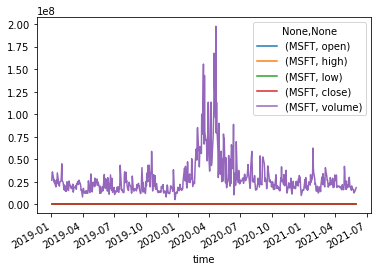

In [12]:
df_ibm_ticker.plot()

In [13]:
df_ibm_ticker.shape

(608, 5)

In [14]:
data = np.array(df_ibm_ticker)

# train test split, 
train , test = data[0:-100], data[-100:]

In [15]:
#df_ibm_ticker[[('IBM', 'open'), ('IBM', 'high'),('IBM', 'low'), ('IBM', 'close'), ('IBM', 'volume')]]
train[0:5]

array([[9.9550000e+01, 1.0175000e+02, 9.8940000e+01, 1.0101000e+02,
        2.6692255e+07],
       [1.0000000e+02, 1.0018500e+02, 9.7400000e+01, 9.7500000e+01,
        3.4611003e+07],
       [9.9720000e+01, 1.0251000e+02, 9.8930000e+01, 1.0177500e+02,
        3.5976325e+07],
       [1.0164000e+02, 1.0326810e+02, 1.0098000e+02, 1.0215000e+02,
        2.8570376e+07],
       [1.0304000e+02, 1.0397000e+02, 1.0171340e+02, 1.0273000e+02,
        2.5193769e+07]])

In [16]:
def window_data(df_ibm_ticker, window, feat_col_number, target_col_number):
    X = []
    y = []
    for i in range(len(df_ibm_ticker) - window - 1):
        features = df_ibm_ticker.iloc[i:(i + window), feat_col_number]
        target = df_ibm_ticker.iloc[(i + window), target_col_number]
        X.append(features)
        y.append(target)
    return np.array(X), np.array(y).reshape(-1, 1)

In [17]:
# Predict Closing Prices using a 10 day window of previous closing prices

window_size = 10

# Column index 0 is the 'IBM ' column
# Column index 1 is the `Close` column
feature_column = 1
target_column = 1
X, y = window_data(df_ibm_ticker, window_size, feature_column, target_column)

In [18]:
# Use 80% of the data for training and the remaineder for testing
data_train = int(.8 * len(X))
X_train = X[:data_train - 1]
X_test = X[data_train:]
y_train = y[:data_train - 1]
y_test = y[data_train:]

In [19]:
# Use the MinMaxScaler to scale data between 0 and 1.
from sklearn.preprocessing import MinMaxScaler
x_train_scaler = MinMaxScaler()
x_test_scaler = MinMaxScaler()
y_train_scaler = MinMaxScaler()
y_test_scaler = MinMaxScaler()

# Fit the scaler for the training Data
x_train_scaler.fit(X_train)
y_train_scaler.fit(y_train)

# Scale the training data
X_train = x_train_scaler.transform(X_train)
y_train = y_train_scaler.transform(y_train)

# Fit the scaler for the testing Data
x_test_scaler.fit(X_test)
y_test_scaler.fit(y_test)

# Scale the y_test data
X_test = x_test_scaler.transform(X_test)
y_test = y_test_scaler.transform(y_test)

In [20]:
# Reshape the features for the model
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [21]:
# Build the LSTM model. 
model = Sequential()
model.add(LSTM(
    units=30, return_sequences=True,
    input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=30, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=30))
model.add(Dropout(0.2))
model.add(Dense(1))

In [22]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [23]:
# Summarize the model
#model.summary()

In [24]:
# Train the model
model.fit(X_train, y_train, epochs=20, shuffle=False, batch_size=1, verbose=1)

Epoch 1/20
416/416 [==============================] - 101s 35ms/step - loss: 0.0050
Epoch 2/20
416/416 [==============================] - 14s 35ms/step - loss: 0.0136
Epoch 3/20
416/416 [==============================] - 14s 34ms/step - loss: 0.0167
Epoch 4/20
416/416 [==============================] - 15s 36ms/step - loss: 0.0196
Epoch 5/20
416/416 [==============================] - 15s 36ms/step - loss: 0.0184
Epoch 6/20
416/416 [==============================] - 15s 35ms/step - loss: 0.0087 
Epoch 7/20
416/416 [==============================] - 15s 37ms/step - loss: 0.0060
Epoch 8/20
416/416 [==============================] - 16s 38ms/step - loss: 0.0059
Epoch 9/20
416/416 [==============================] - 15s 36ms/step - loss: 0.0080
Epoch 10/20
416/416 [==============================] - 15s 36ms/step - loss: 0.0064
Epoch 11/20
416/416 [==============================] - 15s 35ms/step - loss: 0.0059
Epoch 12/20
416/416 [==============================] - 11s 27ms/step - loss: 0.0057

In [29]:
# Evaluate the model
model.evaluate(X_test, y_test)

6/6 [==============================] - 0s 19ms/step - loss: 0.0488


0.04875478893518448

In [30]:
# Make some predictions
predict_msft = model.predict(X_test)

In [31]:
# Recover the original prices instead of the scaled version
predicted_prices = y_test_scaler.inverse_transform(predict_msft)
real_prices = y_test_scaler.inverse_transform(y_test.reshape(-1, 1))

In [35]:
# Create a DataFrame of Real and Predicted values
stocks = pd.DataFrame({
    "Real": real_prices.ravel(),
    "Predicted": predicted_prices.ravel()
}, index = df_ibm_ticker.index[-len(real_prices): ]) 
stocks.head()

,Real,Predicted
time,,
2020-09-14 00:00:00-04:00,208.63,238.167160
2020-09-15 00:00:00-04:00,209.20,235.447617
2020-09-16 00:00:00-04:00,209.78,232.853928
2020-09-17 00:00:00-04:00,210.65,230.697449
2020-09-18 00:00:00-04:00,204.33,229.052048


<AxesSubplot:xlabel='time'>

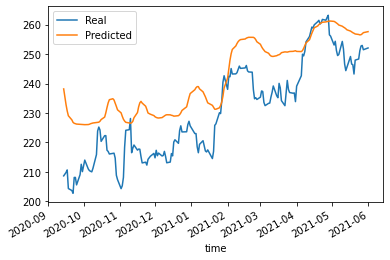

In [37]:
stocks.plot()